# 4. 결측치(누락값) 처리하기 
4-1. 데이터프레임에서 결측치 확인하는 방법  
4-2. 결측치 처리하기 
    - 임의 값으로 채우기
    - 바로 앞/뒤 값으로 채우기
    - 보간법(interpolate)
    - 아예 삭제
4-3. 결측치가 포함된 데이터 계산하기(for 수치형 데이터)

## 4-1. 결측치 확인하기
- `df.isnull().sum()` / `df.isna().sum()` : 각 열별 누락값의 개수 
- `df.notnull().sum()` / `df.count()` : 각 열별 누락값이 아닌 것의 개수
- 위의 메서드를 활용해 특정 열의 결측치를 전부 제거한 데이터만 반환 가능

In [1]:
import pandas as pd
import seaborn as sns

## 데이터는 seaborn에서 기본적으로 제공하는 titanic 사용
df = sns.load_dataset('titanic')
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


오늘의 예제 데이터. 결측치(NaN) 몇몇개가 보인다.  
실제로 몇개인지 확인해보자!

In [2]:
#열별 결측치의 수 -> 특정 열에만 결측치가 있다 
df.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [3]:
df.isna().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [4]:
# 전체 개수 대비 많은 편일까? -> 각 열별 결측치의 비율
print(df.isna().sum()/len(df))

survived       0.000000
pclass         0.000000
sex            0.000000
age            0.198653
sibsp          0.000000
parch          0.000000
fare           0.000000
embarked       0.002245
class          0.000000
who            0.000000
adult_male     0.000000
deck           0.772166
embark_town    0.002245
alive          0.000000
alone          0.000000
dtype: float64


- deck 열은 77%나 결측치임
- age 열도 20% 결측치 
- 그외 embarked, embark_town은 소수의 결측치 존재

In [5]:
# sum을 뒤에 한번 더붙이면? -> 모든 NaN의 개수 총합 
df.isna().sum().sum()

869

In [6]:
#그렇다면 결측치가 아닌 것의 개수는?
df.notnull().sum()

survived       891
pclass         891
sex            891
age            714
sibsp          891
parch          891
fare           891
embarked       889
class          891
who            891
adult_male     891
deck           203
embark_town    889
alive          891
alone          891
dtype: int64

In [7]:
df.count()

survived       891
pclass         891
sex            891
age            714
sibsp          891
parch          891
fare           891
embarked       889
class          891
who            891
adult_male     891
deck           203
embark_town    889
alive          891
alone          891
dtype: int64

모든 열 말고, 특정 열의 결측치 개수만 뽑으려면

In [8]:
# embarked 열의 결측치 / 결측치 아닌것의 개수 
print(df['embarked'].isnull().sum())
print(df['embarked'].notnull().sum())

2
889


#### 결측치가 아닌 것들만 뽑는 방법: 불린 인덱싱 활용!

In [9]:
df.notnull() #결측치가 아니면 True, 맞으면 False 반환 

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,True,True,True,True,True,True,True,True,True,True,True,False,True,True,True
1,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True
2,True,True,True,True,True,True,True,True,True,True,True,False,True,True,True
3,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True
4,True,True,True,True,True,True,True,True,True,True,True,False,True,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,True,True,True,True,True,True,True,True,True,True,True,False,True,True,True
887,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True
888,True,True,True,False,True,True,True,True,True,True,True,False,True,True,True
889,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True


In [10]:
# 이 상태에서 전체 불린인덱싱을 하면 -> X
df[df.notnull()]

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [11]:
# 특정 열에 대해서 결측치를 제외하는 방법으로!
## deck 열 결측치는 전부다 삭제 
df2 = df[df['deck'].notnull()]
display(df2.head())
print(len(df), len(df2))

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
6,0,1,male,54.0,0,0,51.8625,S,First,man,True,E,Southampton,no,True
10,1,3,female,4.0,1,1,16.7000,S,Third,child,False,G,Southampton,yes,False
11,1,1,female,58.0,0,0,26.5500,S,First,woman,False,C,Southampton,yes,True


891 203


deck 열이 결측치가 77%나 있었다보니, deck열에 결측치가 있으면 아예 행 삭제시 약 700개의 행이 날아감. 데이터 손실로 이어질수도..

#### (참고) value_counts() 메서드에서 결측치의 수도 함께 뽑기 
`df['col'].value_counts(dropna = True)`

In [12]:
#디폴트 
df['deck'].value_counts()

C    59
B    47
D    33
E    32
A    15
F    13
G     4
Name: deck, dtype: int64

In [13]:
#하지만 NaN을 drop하지 않으면?
df['deck'].value_counts(dropna = False)

NaN    688
C       59
B       47
D       33
E       32
A       15
F       13
G        4
Name: deck, dtype: int64

## 4-2. 결측치를 처리하는 다양한 방법
- `df['col'].fillna(임의의 값)`: 임의의 값으로 전부 채우기
- `df['col'].fillna(method = 'ffill' or 'bfill')` : 앞의 값 or 뒤의 값으로 채우기
- `df['col'].interpolate()`: 보간법(interpolate)
- `df.dropna(how = 'any' or 'all')`: 아예 누락값 삭제하기
- 또는 머신러닝으로 다른 열들을 활용해 결측치 열을 예측하는 방법도 있다!

In [14]:
df.head(3)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True


#### 1) df['col'].fillna(): 임의 값으로 전부 채우기
- 처리해야 하는 데이터프레임의 크기가 매우 큰 경우에 자주 사용한다.
- 모든 열의 결측치를 일괄적으로 특정값으로 바꾸고 싶다면(ex. 모든 열의 NaN을 0으로 바꿔주고 싶다면)
    - 이 경우 컬럼 지정 없이 그냥 `df.fillna(0, inplace = True)`를 써주면 된다

In [15]:
# 예시로 age의 결측치를 age의 평균값으로 채워보자.
df['age'].fillna(df['age'].mean(), inplace = True)

In [16]:
df['age'].isna().sum() #결측치가 사라짐

0

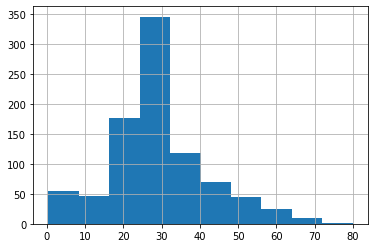

In [17]:
df['age'].hist()

In [18]:
# 숫자뿐만 아니라 문자도 된다! 
# 예시로 embark_town의 분포를 보면
df['embark_town'].value_counts(dropna = False) 

Southampton    644
Cherbourg      168
Queenstown      77
NaN              2
Name: embark_town, dtype: int64

In [19]:
#결측치가 2개 있고, 가장 다수의 값인 'Southampton'으로 채워보자
df['embark_town'].fillna('Southampton', inplace = True)

In [20]:
#다시확인
df['embark_town'].value_counts(dropna = False) 

Southampton    646
Cherbourg      168
Queenstown      77
Name: embark_town, dtype: int64

#### 2) df['col'].fillna(method): 앞의 값 또는 뒤의 값으로 채우기
- method 옵션
    - ffill: 앞의 값 / bfill: 뒤의 값
- ffill을 사용하는 경우) 만일 데이터의 가장 첫번째 값이 NaN이라면 채워지지 못하고 NaN으로 출력
- bfill을 사용하는 경우) 만일 데이터의 가장 마지막 값이 NaN이라면 채워지지 못하고 NaN으로 출력

In [21]:
# 데이터 다시 초기화 
df = sns.load_dataset('titanic')
df.isna().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [22]:
# 예를 들어 age의 값을 앞의 값으로 채워보자.
df.iloc[190:200, 0:4]

,survived,pclass,sex,age
190,1,2,female,32.0
191,0,2,male,19.0
192,1,3,female,19.0
193,1,2,male,3.0
194,1,1,female,44.0
195,1,1,female,58.0
196,0,3,male,NaN
197,0,3,male,42.0
198,1,3,female,NaN
199,0,2,female,24.0


In [23]:
# 위에 존재하는 2개의 NaN의 값은 바로 아래의 값인 42, 24로 채울 것
df['age'].fillna(method = 'bfill', inplace = True)
df.iloc[190:200, 0:4]

,survived,pclass,sex,age
190,1,2,female,32.0
191,0,2,male,19.0
192,1,3,female,19.0
193,1,2,male,3.0
194,1,1,female,44.0
195,1,1,female,58.0
196,0,3,male,42.0
197,0,3,male,42.0
198,1,3,female,24.0
199,0,2,female,24.0


In [24]:
# 이번엔 deck 열-> 얘는 ffill로 채워보자.
df.iloc[:10, 10:15]

,adult_male,deck,embark_town,alive,alone
0,True,NaN,Southampton,no,False
1,False,C,Cherbourg,yes,False
2,False,NaN,Southampton,yes,True
3,False,C,Southampton,yes,False
4,True,NaN,Southampton,no,True
5,True,NaN,Queenstown,no,True
6,True,E,Southampton,no,True
7,False,NaN,Southampton,no,False
8,False,NaN,Southampton,yes,False
9,False,NaN,Cherbourg,yes,False


In [25]:
df['deck'].fillna(method = 'ffill', inplace = True)
df.iloc[:10, 10:15]

,adult_male,deck,embark_town,alive,alone
0,True,NaN,Southampton,no,False
1,False,C,Cherbourg,yes,False
2,False,C,Southampton,yes,True
3,False,C,Southampton,yes,False
4,True,C,Southampton,no,True
5,True,C,Queenstown,no,True
6,True,E,Southampton,no,True
7,False,E,Southampton,no,False
8,False,E,Southampton,yes,False
9,False,E,Cherbourg,yes,False


맨 첫번째 값이 NaN이기 때문에 ffill 사용 시 NaN으로 그대로 출력된다.

#### 3) df['col'].interpolate(): 보간법을 활용하여 채우기
- 이 방법은 누락값 양쪽에 있는 값으로 중간값을 구해 누락값에 넣는 방법이다. 중간값을 구하는 것이므로, `수치형 데이터`일 때 사용.
- 다만 맨 첫번째 행/마지막 행이 NaN이라면 중간값을 구하지 못하므로 그대로 NaN으로 나온다.

In [26]:
# 데이터 다시 초기화 
df = sns.load_dataset('titanic')
# 예를 들어 age의 값을 양옆의 중간값으로 채워보자.
df.iloc[190:200, 0:4]

,survived,pclass,sex,age
190,1,2,female,32.0
191,0,2,male,19.0
192,1,3,female,19.0
193,1,2,male,3.0
194,1,1,female,44.0
195,1,1,female,58.0
196,0,3,male,NaN
197,0,3,male,42.0
198,1,3,female,NaN
199,0,2,female,24.0


In [27]:
df['age'].interpolate(inplace = True)
df.iloc[190:200, 0:4]

,survived,pclass,sex,age
190,1,2,female,32.0
191,0,2,male,19.0
192,1,3,female,19.0
193,1,2,male,3.0
194,1,1,female,44.0
195,1,1,female,58.0
196,0,3,male,50.0
197,0,3,male,42.0
198,1,3,female,33.0
199,0,2,female,24.0


In [28]:
print((58+42)/2, (42+24)/2)

50.0 33.0


#### 4) df.dropna(how = 'any' or 'all', axis = 0): 아예 누락값 삭제하기 
- `how = 'any'`: 하나의 셀이라도 NaN이 있으면 그 행 전체 삭제
- `how = 'all'` : 한 행의 모든 셀에 NaN이 있어야 그 행 전체 삭제
- 아예 행 자체를 삭제하는 것이므로, 결측치가 많은 데이터의 경우엔 데이터 수가 너무 적어질 수도, 또는 너무 편향된 데이터가 될 수도 있음에 주의!! 
    - 결측치가 너무 많거나 데이터의 수가 적다면 이 방법은 최후의 수단으로 남겨둬야 한다

In [29]:
# how = 'any' 사용하는 경우 
df = sns.load_dataset('titanic')
df.isna().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [30]:
print(df.shape)

(891, 15)


전체 데이터 수는 891개인데, 이 중에서 결측치가 한 셀에만 있어도 모조리 삭제한다면 데이터가 많이 없어질 것이다. (특히 deck 열엔 결측치가 688개나 있기에..)

In [31]:
df2 = df.dropna(how = 'any')
print(df2.shape) #이렇게 182개만 남게 되었음 

(182, 15)


In [32]:
# how = 'all' 사용하는 경우
df3 = df.dropna(how = 'all')
print(df3.shape)

(891, 15)


그렇다고 how = 'all'을 사용하면 행 내의 모든 셀에 NaN이 들어있는 경우만 삭제되므로, 잘 삭제가 되지 않음. 모든 셀이 다 NaN으로 된 데이터는 잘 없으므로.  
titanic 데이터도 그렇기 때문에 아무 데이터도 삭제되지 않았다

## 4-3. 결측치가 포함된 데이터 계산하기(수치형 데이터)
보통의 경우엔 결측치(NaN)을 제거하거나 값을 넣어 처리를 하지만, 결측치를 처리할 수 없는 경우라고 해보자.  
이렇게 결측치가 남아있는 데이터에서 계산을 하는 방법을 알아보자.

#### 1) 사칙연산 계산 시 하나라도 NaN이 있으면 NaN을 반환함

In [33]:
df.head(3)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True


In [34]:
#예를들어 NaN이 있는 age와 fare를 곱한다고 해보자 
df['new_col'] = df['age'] * df['fare']
df.isna().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
new_col        177
dtype: int64

age와 똑같이, new_col의 NaN가 177개 생긴다!

In [35]:
df.iloc[190:200, :]

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,new_col
190,1,2,female,32.0,0,0,13.0000,S,Second,woman,False,NaN,Southampton,yes,True,416.0000
191,0,2,male,19.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True,247.0000
192,1,3,female,19.0,1,0,7.8542,S,Third,woman,False,NaN,Southampton,yes,False,149.2298
193,1,2,male,3.0,1,1,26.0000,S,Second,child,False,F,Southampton,yes,False,78.0000
194,1,1,female,44.0,0,0,27.7208,C,First,woman,False,B,Cherbourg,yes,True,1219.7152
195,1,1,female,58.0,0,0,146.5208,C,First,woman,False,B,Cherbourg,yes,True,8498.2064
196,0,3,male,NaN,0,0,7.7500,Q,Third,man,True,NaN,Queenstown,no,True,NaN
197,0,3,male,42.0,0,1,8.4042,S,Third,man,True,NaN,Southampton,no,False,352.9764
198,1,3,female,NaN,0,0,7.7500,Q,Third,woman,False,NaN,Queenstown,yes,True,NaN
199,0,2,female,24.0,0,0,13.0000,S,Second,woman,False,NaN,Southampton,no,True,312.0000


#### 2) 알아서 NaN을 걸러 계산하는 경우 
- describe()
- 집계함수의 옵션에 `skipna = True` (디폴트)

In [36]:
# describe로 통계량을 계산하는 경우엔? -> 알아서 NaN은 제거하고 계산
df.describe()

,survived,pclass,age,sibsp,parch,fare,new_col
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000,714.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208,1104.142053
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429,1949.356185
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400,203.906250
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200,378.500000
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000,1194.243750
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200,18443.851200


In [37]:
# 집계함수 사용시 -> 알아서 NaN은 제거하고 계산
df['age'].mean()

29.69911764705882

In [38]:
df['age'].mean(skipna = False)

nan

In [39]:
print(df['age'].sum(skipna = True)) #디폴트
print(df['age'].sum(skipna = False))

21205.17
nan
